In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"E:\Academics\ML datasets\Bank marketing data\bank-full.csv")
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


No missing data.

In [4]:
df['y']=(df['y']=='yes').astype(int)

In [5]:
# to be used later for seeing feature importance graph.
clone_df=df.copy()
cat_features=clone_df.select_dtypes(exclude="int64").columns

*Visualization of some important aspects within the data.*

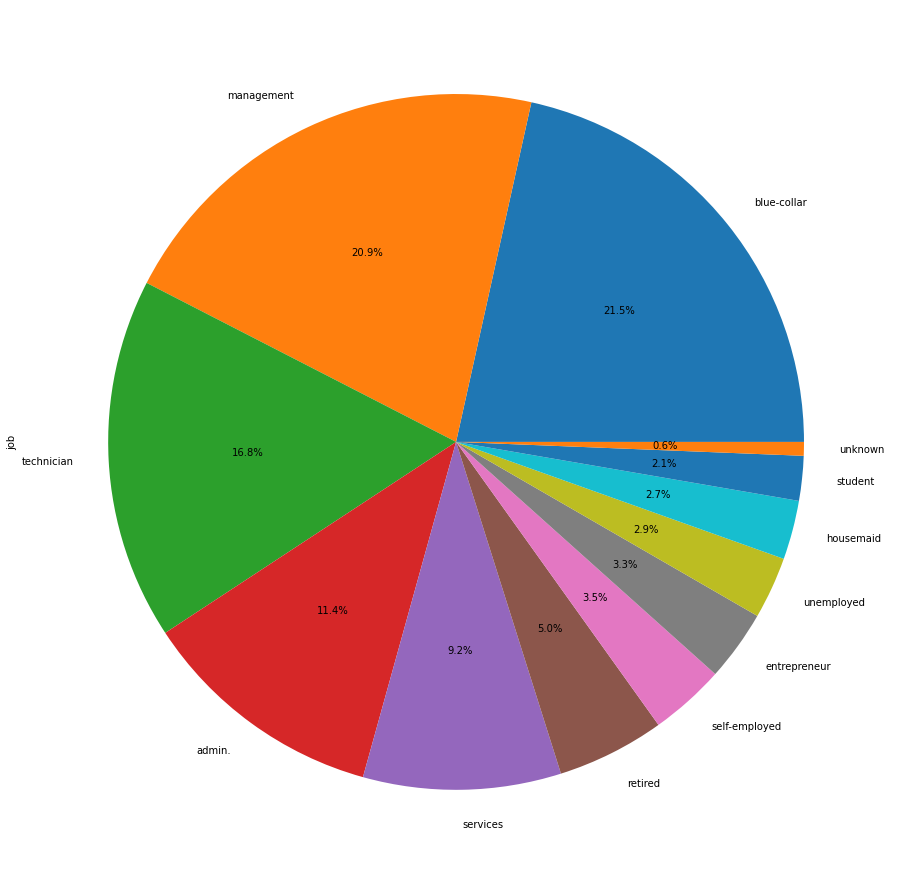

In [6]:
plt.figure(figsize=(20,16))
df['job'].value_counts().plot.pie(autopct='%1.1f%%')

**Blue-collar,Management and Technicians constitutes 60% percent of the population .**

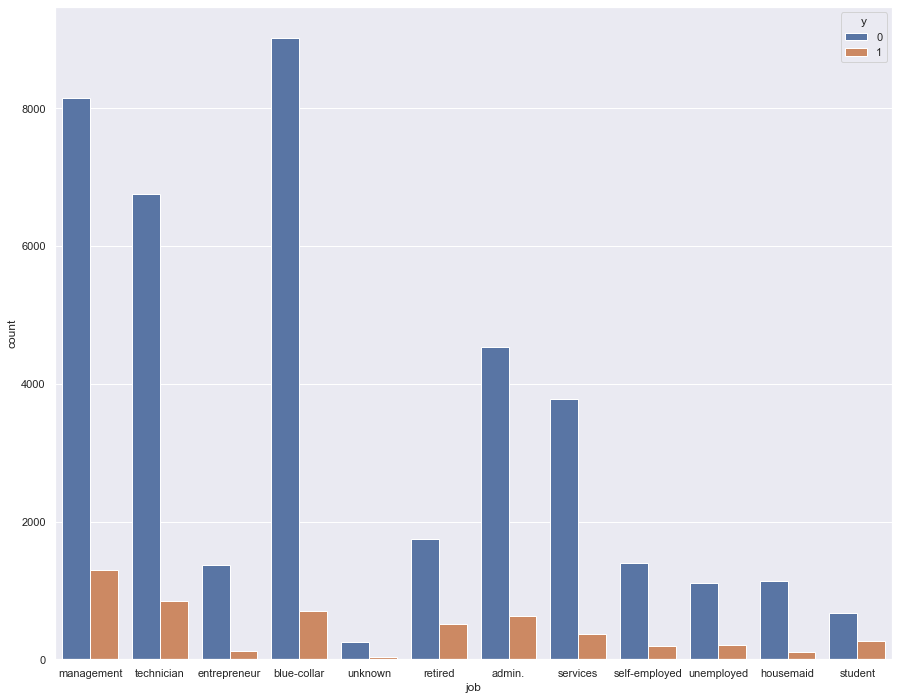

In [7]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.countplot(df['job'],hue='y',data=df)
plt.show()

<Figure size 1152x864 with 0 Axes>

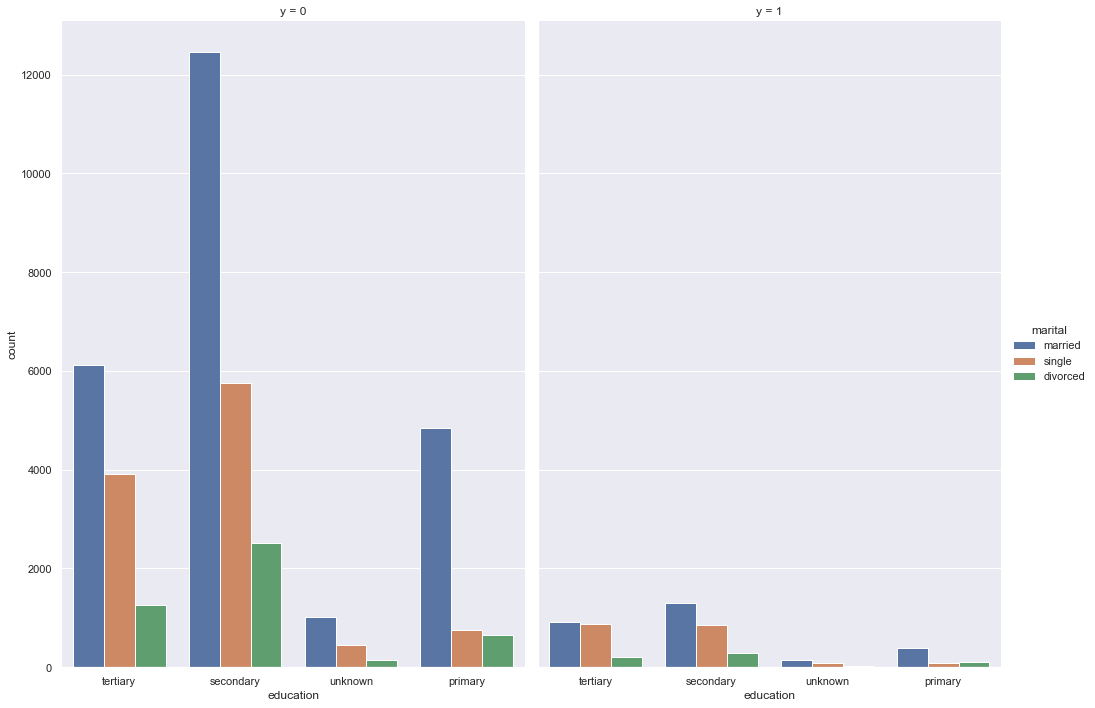

In [8]:
sns.set(style="darkgrid")
plt.figure(figsize=(16,12))
sns.catplot(x="education", hue="marital", col="y",
                data=df, kind="count",
                height=10, aspect=.7);
plt.show()

In [9]:
df['y'].value_counts()/df.shape[0]

0    0.883015
1    0.116985
Name: y, dtype: float64

**As it can be seen,the dataset is too much skewed.Only 11.7% of total population of the dataset has subscribed for the deposit.**

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


**Let's detect outliers in the numerical features in the dataset.We will denote that values as outliers which are atleast 3 standard deviations away from mean**

In [11]:
numerical_features=(df.select_dtypes(exclude=['object'])).columns
numerical_features=list(numerical_features)

# drop the target variable 'y'
numerical_features.remove('y')

for features in numerical_features:
    mean=df[features].mean(axis=0)
    std=df[features].std(axis=0)
    upper_thres=mean+3*std
    lower_thres=mean-3*std
    outliers=0
    for i in range(df.shape[0]):
        if df[features].iloc[i]>=upper_thres or  df[features].iloc[i]<=lower_thres:
            outliers+=1
    print("{features}->>  outliers: {outlier}".format(features=features,outlier=outliers))

age->>  outliers: 381
balance->>  outliers: 745
day->>  outliers: 0
duration->>  outliers: 963
campaign->>  outliers: 840
pdays->>  outliers: 1723
previous->>  outliers: 582


In [12]:
# Day and month columns appear to be uncorrelated.
df['month'][df['y']==1].value_counts()

may    925
aug    688
jul    627
apr    577
jun    546
feb    441
nov    403
oct    323
sep    269
mar    248
jan    142
dec    100
Name: month, dtype: int64

In [13]:
df['month'][df['y']==0].value_counts()

may    12841
jul     6268
aug     5559
jun     4795
nov     3567
apr     2355
feb     2208
jan     1261
oct      415
sep      310
mar      229
dec      114
Name: month, dtype: int64

In [14]:
import warnings
warnings.simplefilter("ignore")


subscribers_w_loan=df[df['loan']=='yes'][df['y']==1].shape[0]
subscribers_wo_loan=df[df['loan']=='no'][df['y']==1].shape[0]

subscribers=df[df['y']==1]

print("subscribers_w_loan ->>",subscribers_w_loan/subscribers.shape[0])
print("\n")
print("subscribers_wo_loan ->>",subscribers_wo_loan/subscribers.shape[0])

subscribers_w_loan ->> 0.09151068254868595


subscribers_wo_loan ->> 0.908489317451314


**90% subscribers are without loan**.

# Another very crucial aspect is the mode of communication.
 

In [15]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

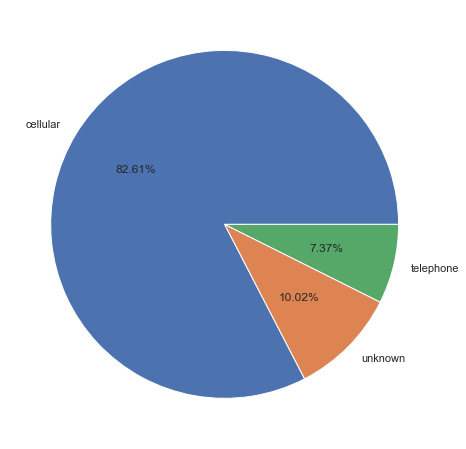

In [16]:
# subscribers who are contacted by various modes.
cellular=0
unknown=0
telephone=0
for x in range(df.shape[0]):
    if df['y'].iloc[x]==1:
        if df['contact'].iloc[x]=='cellular':
            cellular+=1
        if df['contact'].iloc[x]=='unknown':
            unknown+=1
        if df['contact'].iloc[x]=='telephone':
            telephone+=1


plt.figure(figsize=(15,8))
contacts = ['cellular', 'unknown', 'telephone']
sizes = [cellular,unknown,telephone]
plt.pie(sizes, labels = contacts,autopct='%1.2f%%')
plt.show()

**Most of the people who subscribed were contacted via cellular mode(82.61%).

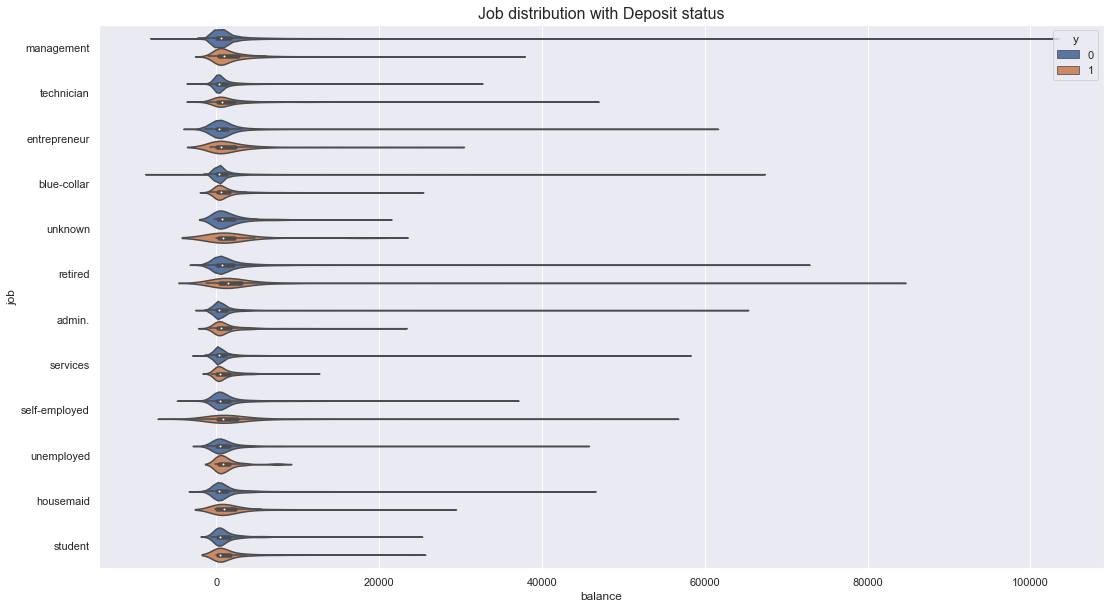

In [17]:
plt.figure(figsize=(18,10))
sns.violinplot(x="balance",y="job",hue='y',data=df)
plt.title("Job distribution with Deposit status",fontsize=16)
plt.show()

In [18]:
df['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

**Most of the population is targeted in the first 10 campaigns.**

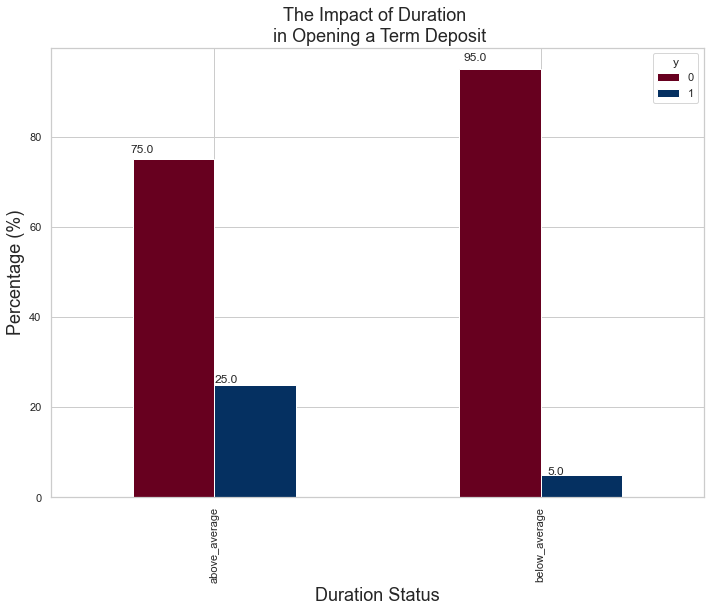

In [19]:
# Duration of the campaign also plays a great role,has a good correlation with deposit subscription.

# this code snippet is forked.

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['y']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

**Above average duration has clearly a greater impact than below average(25% over 5%).**

# Has the previous marketing campaign has any impact on this campaign??

In [20]:
df['poutcome'].value_counts()    

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

*But sadly,this data is not reliable as most of the previous campaign outcomes are unknown.

<Figure size 1080x576 with 0 Axes>

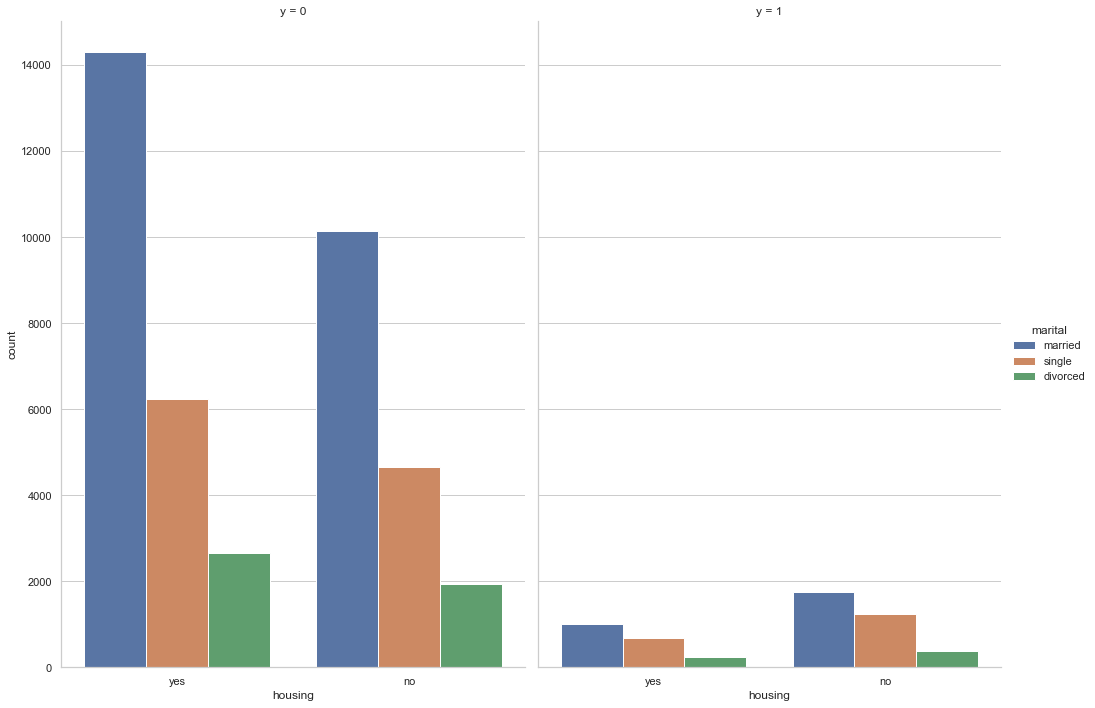

In [21]:
# housing with marital status
plt.figure(figsize=(15,8))
sns.catplot(x="housing", hue="marital", col="y",
                data=df, kind="count",
                height=10, aspect=.7);
plt.show()

*Let us see the distribution of pdays and previous in the population*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DDC0D95910>]],
      dtype=object)

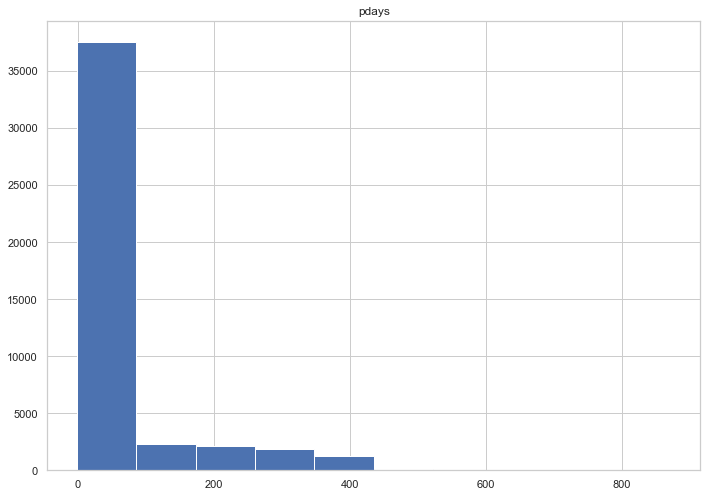

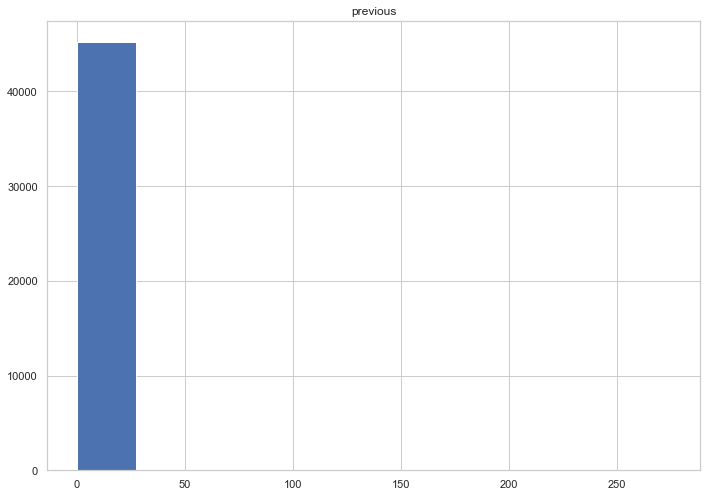

In [22]:
df.hist(column='pdays')
df.hist(column='previous')

# Let us do combination of features with boxplots.

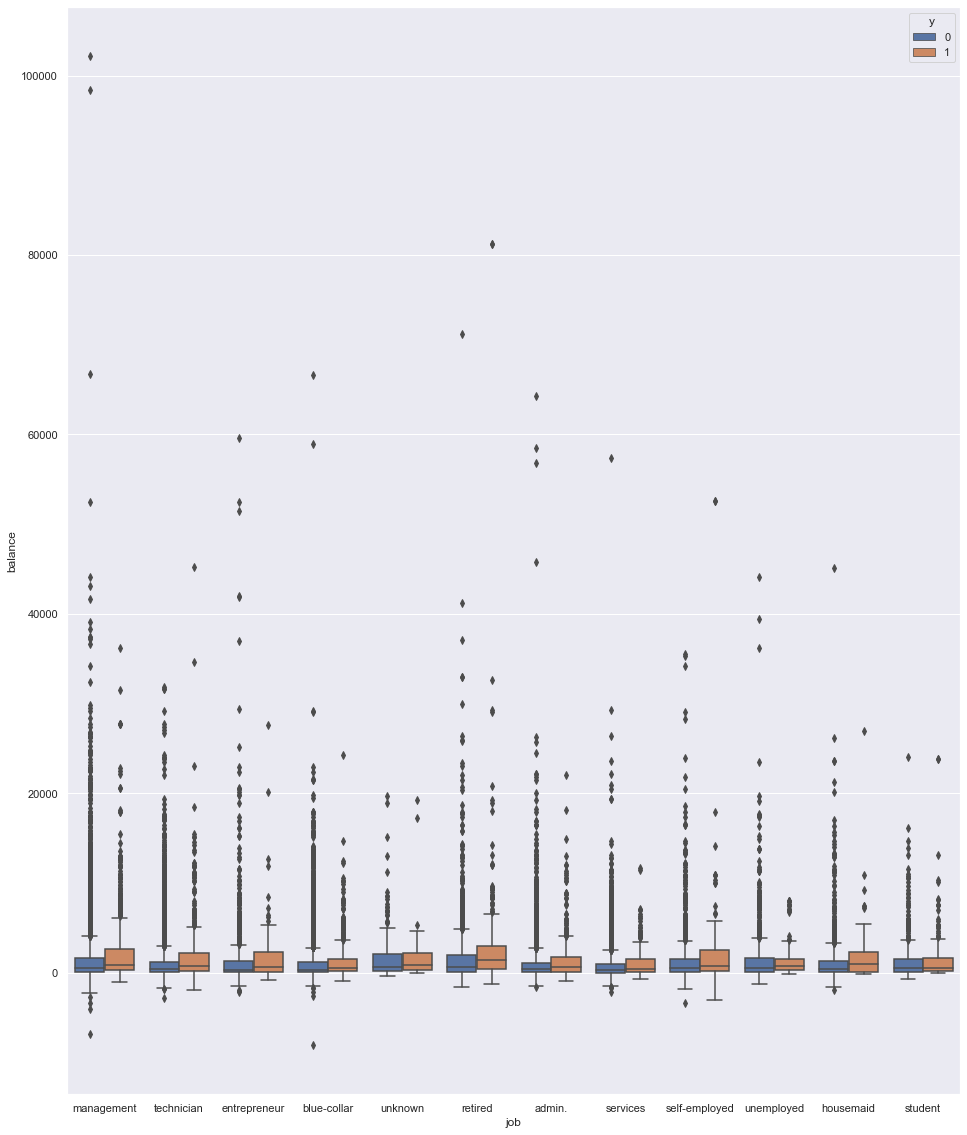

In [23]:
plt.figure(figsize=(16,20))
sns.set_style("darkgrid")
sns.boxplot(x='job',y='balance',data=df,hue='y',whis=1.5)
plt.show()

*The 75 percentile mark of positive class of the target is greater irrespective of jobs.This suggests that people with more bank balance tend to subscribe more.

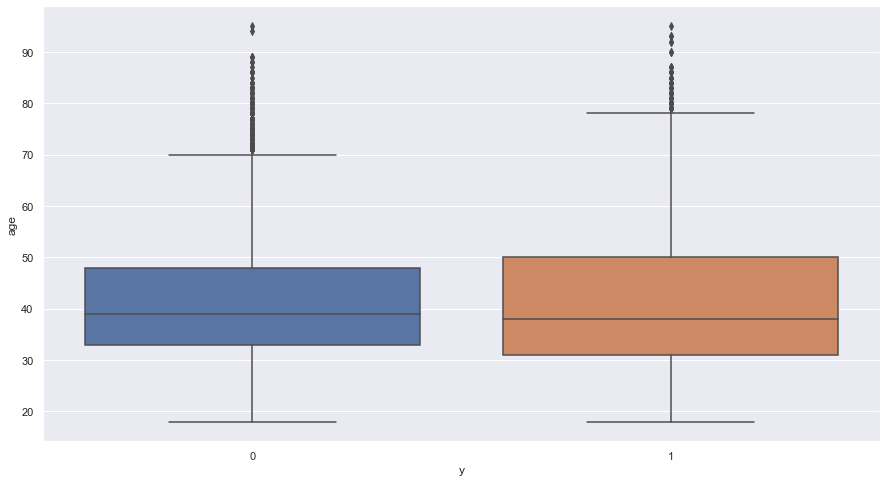

In [24]:
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.boxplot(x='y',y='age',data=df,whis=1.5)
plt.show()

**Now splitting data in the right manner is very important.The training and testing set must contain equal proportions of all the labels in the target function.The following dataset is skewed towards subscriber.
   So,Stratified Sampling is to be done.

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

ss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in ss.split(df,df['y']):
    X_train,y_train=df.iloc[train_index],df['y'].iloc[train_index]
    X_test,y_test=df.iloc[test_index],df['y'].iloc[test_index]

In [26]:
#As we are working on a imbalanced dataset,we will apply random undersampling in the training set to make the two labels 50-50.

#This will reduce the chance of overfitting and more chance of detecting the positive class.

y_train.value_counts()

0    31937
1     4231
Name: y, dtype: int64

In [27]:
train_df=pd.concat([X_train,y_train])

#Shuffle the training instances
X_train=X_train.sample(frac=1)

depositor_df=X_train.loc[X_train['y']==1]
non_depositor_df=X_train.loc[X_train['y']==0][:4231]

balanced_data=pd.concat([depositor_df,non_depositor_df])
balanced_data=balanced_data.sample(frac=1)

features_usampled=X_train.drop(['y'],axis=1)
X_test=X_test.drop(['y'],axis=1)

features_usampled.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,duration_status
6342,38,management,single,tertiary,no,16957,yes,no,unknown,27,may,142,2,-1,0,unknown,below_average
15060,46,management,divorced,tertiary,no,-154,no,no,cellular,17,jul,201,1,-1,0,unknown,below_average
35760,35,management,single,tertiary,no,642,no,no,cellular,8,may,278,1,-1,0,unknown,above_average
41560,46,management,married,tertiary,no,7331,no,no,cellular,11,sep,658,4,95,2,other,above_average
25476,48,technician,married,primary,yes,-530,no,yes,cellular,19,nov,119,1,-1,0,unknown,below_average
23474,55,technician,married,secondary,no,3207,no,no,cellular,28,aug,85,12,-1,0,unknown,below_average
11841,47,technician,married,tertiary,no,1694,no,yes,unknown,20,jun,560,3,-1,0,unknown,above_average
29866,53,management,married,tertiary,no,20772,no,no,cellular,4,feb,715,1,-1,0,unknown,above_average
447,50,self-employed,married,unknown,no,-84,yes,no,unknown,6,may,101,1,-1,0,unknown,below_average
42965,34,admin.,married,secondary,no,2374,yes,no,cellular,9,feb,243,2,92,3,success,below_average


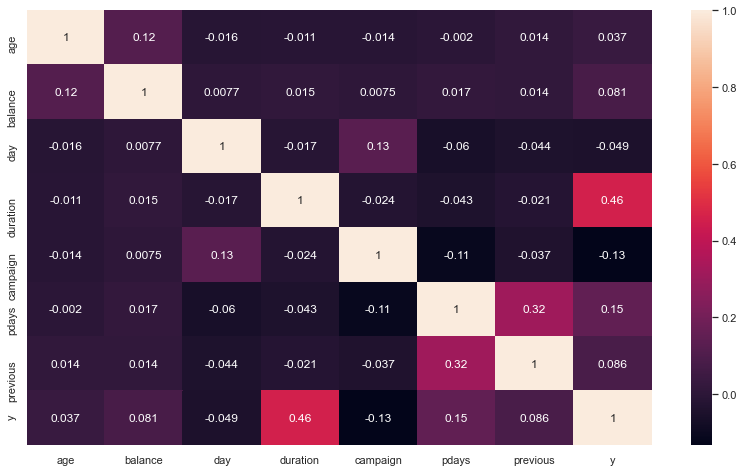

In [28]:
corr=balanced_data.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)

**Most of the numerical features except duration are uncorrelated.The target perhaps is much dependent on the categorical features or the relationships are non-linear.**

**Create a numerical pipeline and categorical pipeline.

  ->Numerical Pipeline:feature selection+standard scaling
  ->Categorical Pipeline:feature selection+Label/One-Hot Encoding 
  
**Combine the pipelines using FeatureUnion.

In [29]:
from sklearn.base import TransformerMixin,BaseEstimator

class DataFrameSelector(TransformerMixin,BaseEstimator):
    def __init__(self,attribute_names):
        self.attribute_names=attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names]

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

numerical_pipeline=Pipeline([("numerical_features",DataFrameSelector(["age","balance","duration","campaign","pdays","previous"])),
                            ("scaler",StandardScaler())])



categorical_pipeline=Pipeline([("categorical_features",DataFrameSelector(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'])),("encoder",OneHotEncoder(sparse=False))])

from sklearn.pipeline import FeatureUnion
full_pipeline=FeatureUnion([("numerical_pipeline",numerical_pipeline),
                            ("categorical_pipeline",categorical_pipeline)])

In [31]:
target_usampled=balanced_data['y'].to_numpy()

balanced_data=balanced_data.drop(['y'],axis=1)

y_test=y_test.to_numpy()

features_usampled=full_pipeline.fit_transform(balanced_data)
X_test=full_pipeline.fit_transform(X_test)

# **Now we will apply some standard classification algorithms.

 ->RandomForestClassifier(tweaking max_depth,n_trees,max_leafnodes)
 
 ->Support Vector Machine(kernels=linear,rbf)
 
 ->K Nearest Neighbours(with different number of neighbours)
 
 ->Logistic Regression(tweaking cost function values and regularization techniques namely l1,l2)
 
 ->Naive bayes
 
 Finally we will the combine the models(aggregation) by ensembling techniques.

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

#DecisionTree
dt_clf=DecisionTreeClassifier()
#RandomForest
rf_clf=RandomForestClassifier(random_state=42)
#KNN
knn_clf=KNeighborsClassifier()
#Naive_bayes
nb_clf=GaussianNB()
#Logistic Regression
lr_clf=LogisticRegression(random_state=42)
#Adaboost 
ab_clf=AdaBoostClassifier()
#Gradientboost
xg_clf=GradientBoostingClassifier()


for clf in (dt_clf,rf_clf,knn_clf,nb_clf,lr_clf,ab_clf,xg_clf):
    clf.fit(features_usampled,target_usampled)
    y_pred=clf.predict(features_usampled)
    print(clf.__class__.__name__,accuracy_score(target_usampled,y_pred))

DecisionTreeClassifier 1.0
RandomForestClassifier 1.0
KNeighborsClassifier 0.865752777121248
GaussianNB 0.7341054124320492
LogisticRegression 0.8345544788466084
AdaBoostClassifier 0.8406995982037343
GradientBoostingClassifier 0.861025762231151


# Random Forests do not overfit. The testing performance of Random Forests does not decrease (due to overfitting) as the number of trees increases. Hence after certain number of trees the performance tend to stay in a certain value.

source-Wikipedia

**One of the main causes can be unconstrained fitting of the classifier in the training data.

We will adopt cross-validation techniques to make an estimate of test error.

In [33]:
from sklearn.model_selection import cross_val_predict

#We will be using 3 fold cross-validation,i.e.fitting on 2 folds and predicting on the remaining fold.

for clf in (dt_clf,rf_clf,knn_clf,nb_clf,lr_clf,ab_clf,xg_clf):
    y_pred=cross_val_predict(clf,features_usampled,target_usampled,cv=3)
    print(clf.__class__.__name__,accuracy_score(target_usampled,y_pred))

DecisionTreeClassifier 0.7927203970692508
RandomForestClassifier 0.8534625384069959
KNeighborsClassifier 0.7993382179153864
GaussianNB 0.7252422595131175
LogisticRegression 0.8329000236350744
AdaBoostClassifier 0.836681635547152
GradientBoostingClassifier 0.8470810683053651


**Now it is clear that some models were over-fitting on the training data.
  Only the ensemble methods can do better as the data is complex.

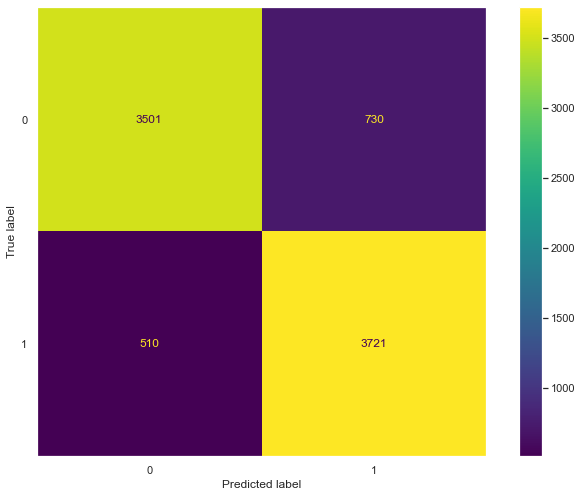

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


y_pred=cross_val_predict(rf_clf,features_usampled,target_usampled,cv=3)
cm=confusion_matrix(target_usampled,y_pred)
cm_display=ConfusionMatrixDisplay(cm).plot()
plt.grid(False)
#plt.title()

**Though there is a huge information loss due to undersampling,but now the minority class is getting detected.Earlier more than 50 % potential depositors were not getting detected(if we do not use random undersampling).

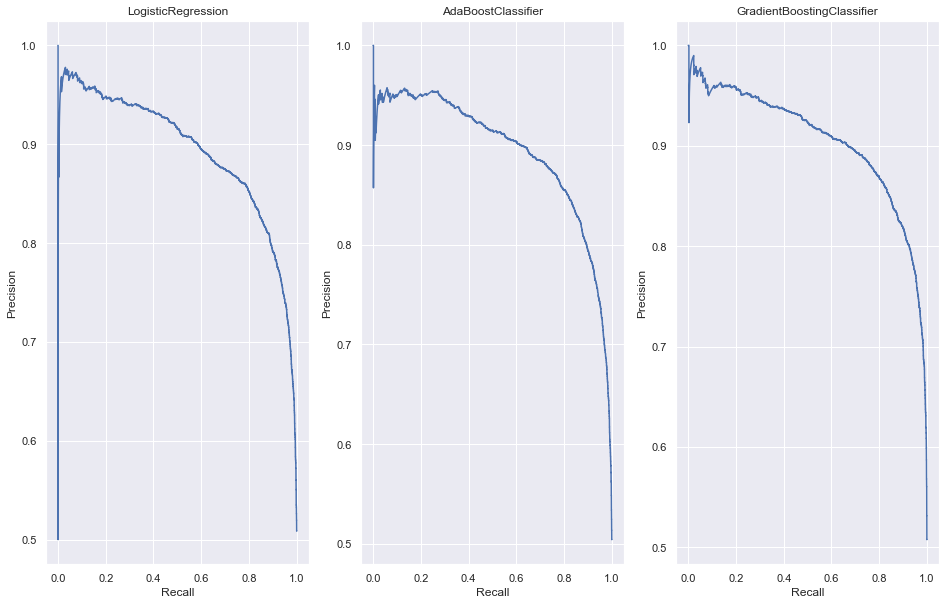

In [35]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve


plt.figure(figsize=(16,10))
plot_no=1
for clf in (lr_clf,ab_clf,xg_clf):
    y_score=cross_val_predict(clf,features_usampled,target_usampled,cv=3,method="decision_function")
    precision,recall,threshold=precision_recall_curve(target_usampled,y_score)
    plt.subplot(1,3,plot_no)
    plt.plot(recall,precision)
    plt.grid(True)
    
    #recall_90_mark=precision[np.argmax(recall>=0.9)]
    #plt.plot([0.9, 0.9], [0.,recall_90_mark], "r:")
    #plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
    #plt.plot([0.4368], [0.9], "ro")
    
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("{clf_name}".format(clf_name=clf.__class__.__name__))
    plot_no+=1

## *Clearly there is a tradeoff between recall and precision.Let us illustrate more with threshold value.

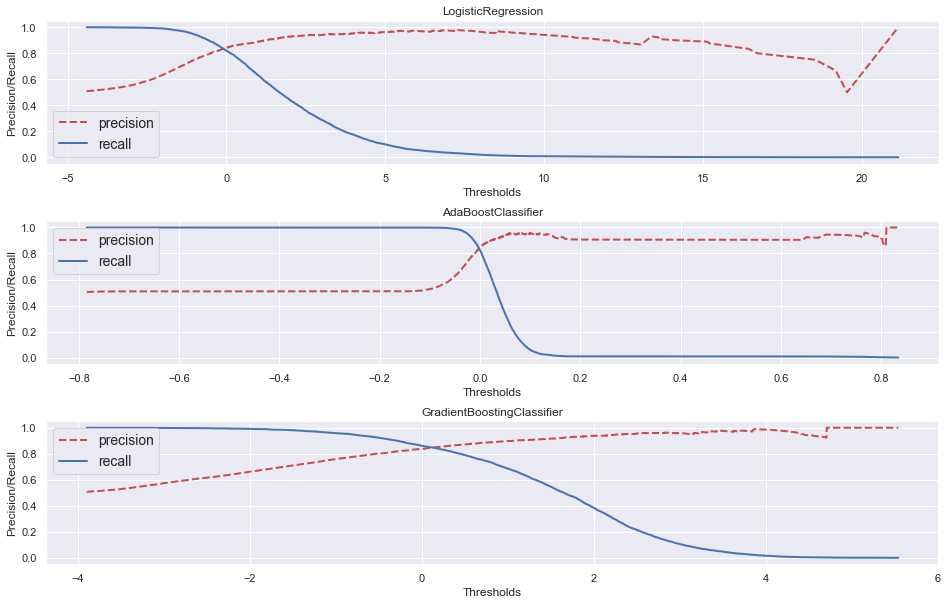

In [36]:
#Let us plot threshold vs precision and recall
plt.figure(figsize=(16,10))
plot_no=1
for clf in (lr_clf,ab_clf,xg_clf):
    y_score=cross_val_predict(clf,features_usampled,target_usampled,cv=3,method="decision_function")
    precision,recall,threshold=precision_recall_curve(target_usampled,y_score)
    plt.subplot(3,1,plot_no)
    
    #The last precision and recall values are always 1. and 0. respectively and do not have a corresponding threshold.
    
    plt.plot(threshold,precision[:-1],'r--',label="precision",linewidth=2)
    plt.plot(threshold,recall[:-1],'b-',label="recall",linewidth=2)
    plt.xlabel("Thresholds")
    plt.ylabel("Precision/Recall")
    plt.legend(loc="best",fontsize=14)
    plt.title("{clf_name}".format(clf_name=clf.__class__.__name__))
    plt.grid(True)
    plt.subplots_adjust(hspace=0.4,wspace=0.4)
    plot_no+=1

*Let us do some work to find feature importances using models like RandomForest,XGBoost,DecisionTree..etc.

*For that,we have to train the model from the beginning.

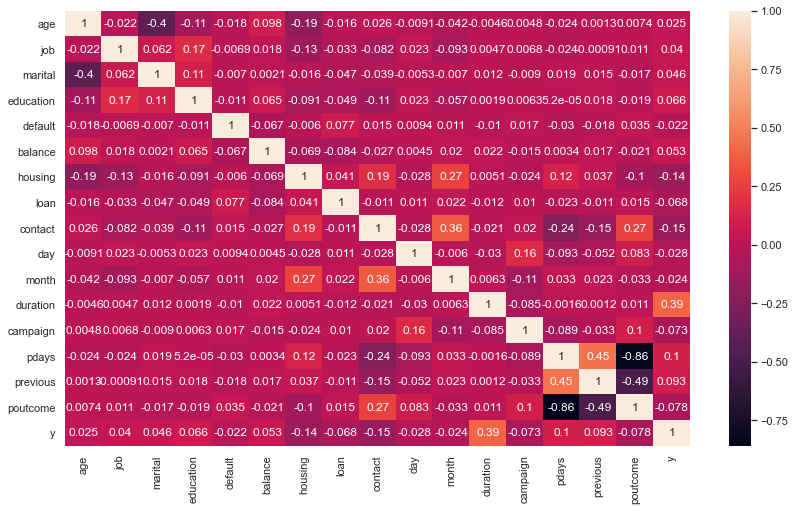

In [37]:
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
for features in cat_features:
    clone_df[features]=enc.fit_transform(clone_df[features])
    
#Though there is a certain hierarchy created between values within a feature as a result of labelencoding,let's try this out.
corr=clone_df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True) 

**Duration,Contact,Housing are most relevant features related to target.

In [38]:
#GridSearchCV to find out optimized models on the dataset
from sklearn.model_selection import GridSearchCV

ss_3_rf=StratifiedShuffleSplit(n_splits=3,test_size=0.2,random_state=42)

rf=RandomForestClassifier(random_state=42)
param_distribs=[{"n_estimators":list(range(100,1000,100)),"max_depth":[3,4,5]}]
rf_gridsearch=GridSearchCV(rf,param_distribs,cv=ss_3_rf,n_jobs=-1,scoring="recall")
rf_gridsearch.fit(features_usampled,target_usampled)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=42, test_size=0.2,
            train_size=None),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'max_depth': [3, 4, 5],
                          'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                           800, 900]}],
             scoring='recall')

In [39]:
rf_gridsearch.best_params_

{'max_depth': 5, 'n_estimators': 400}

In [40]:
rf_gridsearch.best_score_  #poor recall score

0.8412735627435821

In [41]:
gb=GradientBoostingClassifier(random_state=42)

ss_3_gb=StratifiedShuffleSplit(n_splits=3,test_size=0.2,random_state=42)

param_distribs=[{"n_estimators":[100,200,300,400,500],"max_depth":[3,5,7,9]}]
gb_gridsearch=GridSearchCV(gb,param_distribs,cv=ss_3_gb,n_jobs=-1,scoring="recall",verbose=4)
gb_gridsearch.fit(features_usampled,target_usampled)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.5min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=42, test_size=0.2,
            train_size=None),
             estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'max_depth': [3, 5, 7, 9],
                          'n_estimators': [100, 200, 300, 400, 500]}],
             scoring='recall', verbose=4)

In [42]:
gb_gridsearch.best_score_  #much better than the previous one.

0.8782975746225263

In [43]:
gb_gridsearch.best_params_

{'max_depth': 5, 'n_estimators': 200}

# Let us test the accuracies of the model in test set after under-sampling.

In [44]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

rf_model=RandomForestClassifier(max_depth= 5, n_estimators= 800)
rf_model.fit(features_usampled,target_usampled)

gb_model=GradientBoostingClassifier(max_depth = 5, n_estimators=100)
gb_model.fit(features_usampled,target_usampled)

y_pred_rf=rf_model.predict(X_test)
y_pred_gb=gb_model.predict(X_test)


precision_score_rf=precision_score(y_test,y_pred_rf)
precision_score_gb=precision_score(y_test,y_pred_gb)
recall_score_rf=recall_score(y_test,y_pred_rf)
recall_score_gb=recall_score(y_test,y_pred_gb)
f1_score_rf=f1_score(y_test,y_pred_rf)
f1_score_gb=f1_score(y_test,y_pred_gb)
accuracy_score_rf=accuracy_score(y_test,y_pred_rf)
accuracy_score_gb=accuracy_score(y_test,y_pred_gb)

undersampling_results={'Metrics':['precision','recall','f1','accuracy'],'RandomForest':[precision_score_rf,recall_score_rf,f1_score_rf,accuracy_score_rf],
                       'GradientBoost':[precision_score_gb,recall_score_gb,f1_score_gb,accuracy_score_gb]}

acc = pd.DataFrame(undersampling_results).set_index('Metrics')
acc

,RandomForest,GradientBoost
Metrics,,
precision,0.266526,0.289233
recall,0.952741,0.954631
f1,0.416529,0.443956
accuracy,0.687714,0.720226


**It is clear that precision and accuracy is bad because of undersampling of the majority class from the original dataset.
 Now we will try oversampling the minority class in original dataset to see if there are any improvements.**

*Using SMOTE(Synthetic Minority Oversampling Technique) to increase the positive class to the same number of negative class.

In [45]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.model_selection import RandomizedSearchCV

# Gradient-Boosting
gb=GradientBoostingClassifier(random_state=42)
param_distribs=[{"n_estimators":[100,200,300,400,500],"max_depth":[5,7,9],"min_samples_leaf":[1,2,3]}]
grid_gb=RandomizedSearchCV(gb,param_distribs,cv=3,n_jobs=-1,verbose=4,n_iter=20)

acc_gb=[]
precision_gb=[]
recall_gb=[]
f1_gb=[]

targets=X_train['y']
features=X_train.drop(['y'],axis=1)
for train_index,test_index in ss.split(features,targets):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'),grid_gb) # SMOTE happens during Cross Validation not before..
    y_osampled=targets.iloc[train_index]
    
    X_osampled=features.iloc[train_index]
    # separate pipeline for data transformation
    X_osampled=full_pipeline.fit_transform(X_osampled)
    X_valid=full_pipeline.fit_transform(features.iloc[test_index])
    
    model = pipeline.fit(X_osampled,y_osampled)
    best_model=grid_gb.best_estimator_
    y_pred=best_model.predict(X_valid)
    
    acc_gb.append(accuracy_score(targets.iloc[test_index],y_pred))
    precision_gb.append(precision_score(targets.iloc[test_index],y_pred))
    recall_gb.append(recall_score(targets.iloc[test_index],y_pred))
    f1_gb.append(f1_score(targets.iloc[test_index],y_pred))

print("accuracy: {}".format(sum(acc_gb)/len(acc_gb)))
print("precision: {}".format(sum(precision_gb)/len(precision_gb)))
print("recall: {}".format(sum(recall_gb)/len(recall_gb)))
print("f1: {}".format(sum(f1_gb)/len(f1_gb)))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 33.7min finished


accuracy: 0.8231960188001106
precision: 0.3757888697647734
recall: 0.7742316784869976
f1: 0.5059868675164156


**Let us test the oversampled model on the test set.

In [55]:
y_pred=grid_gb.best_estimator_.predict(X_test)
print("accuracy: {}".format(accuracy_score(y_test,y_pred)))
print("precision: {}".format(precision_score(y_test,y_pred)))
print("recall: {}".format(recall_score(y_test,y_pred)))
print("f1: {}".format(f1_score(y_test,y_pred)))

accuracy: 0.7873493309742342
precision: 0.32803180914512925
recall: 0.779773156899811
f1: 0.4617968094038623


<Figure size 864x576 with 0 Axes>

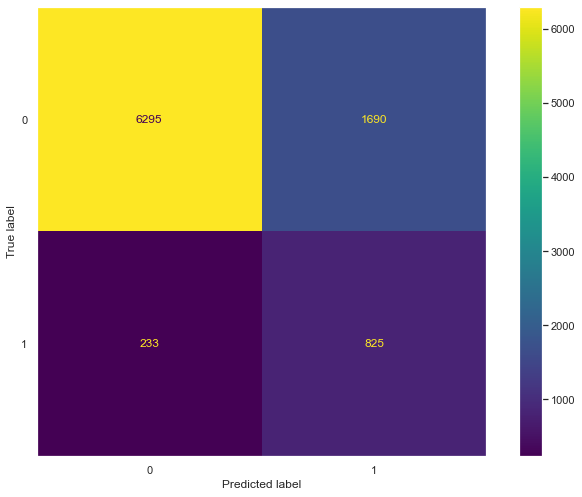

In [57]:
cm1=confusion_matrix(y_test,y_pred)
cm_display1=ConfusionMatrixDisplay(cm1).plot()
plt.grid(False)

# The oversampled model generates a decent accuracy by compromising the recall score.But the precision score has not improved that much.Finally there are lot of scopes for improvement.

In [46]:
def plot_feature_importance(clf,X,y):
    clf.fit(X,y)
    
    imp_name_combined=zip(list(clf.feature_importances_),list(clone_df.columns))
    imp_name_combined=list(imp_name_combined)
    imp_name_combined.sort(key=lambda x:x[0],reverse=True)
    
    #top 6 features
    imp_name_combined=imp_name_combined[:6]
    feature_imp=list(list(zip(*imp_name_combined))[0])
    feature_name=list(list(zip(*imp_name_combined))[1])
    #plot graph
    plt.figure(figsize=(15,10))
    plt.bar(feature_name,feature_imp,width=0.3) 
  
    plt.xlabel("Feature_names") 
    plt.ylabel("Feature_values") 
    plt.title("Feature_importance_graph for {clf_name}".format(clf_name=clf.__class__.__name__)) 
    plt.show() 

In [47]:
y=clone_df["y"]
clone_df=clone_df.drop("y",axis=1)
X=clone_df

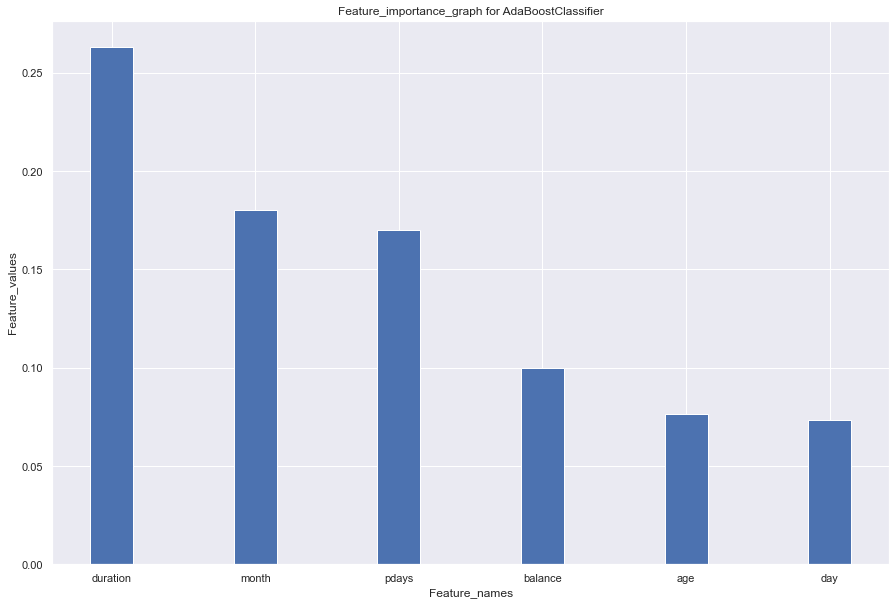

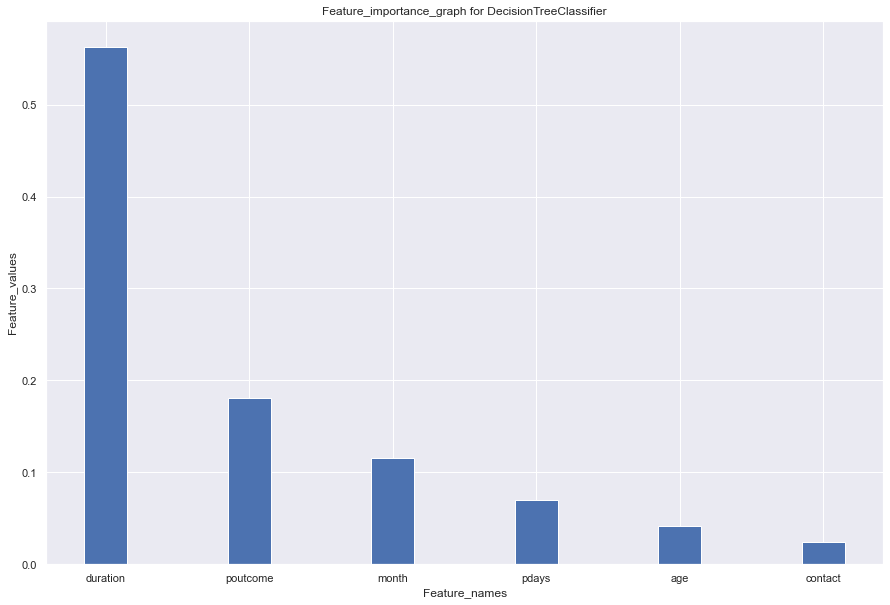

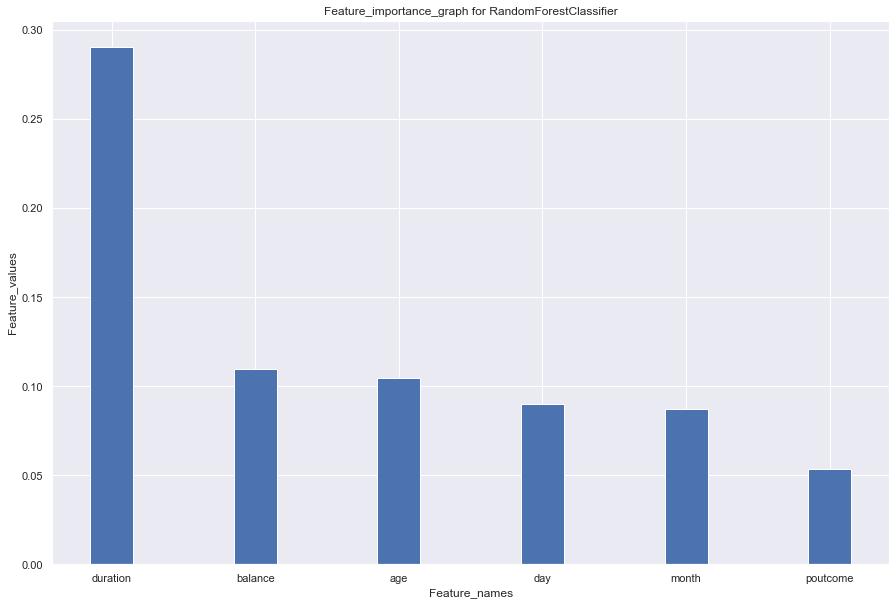

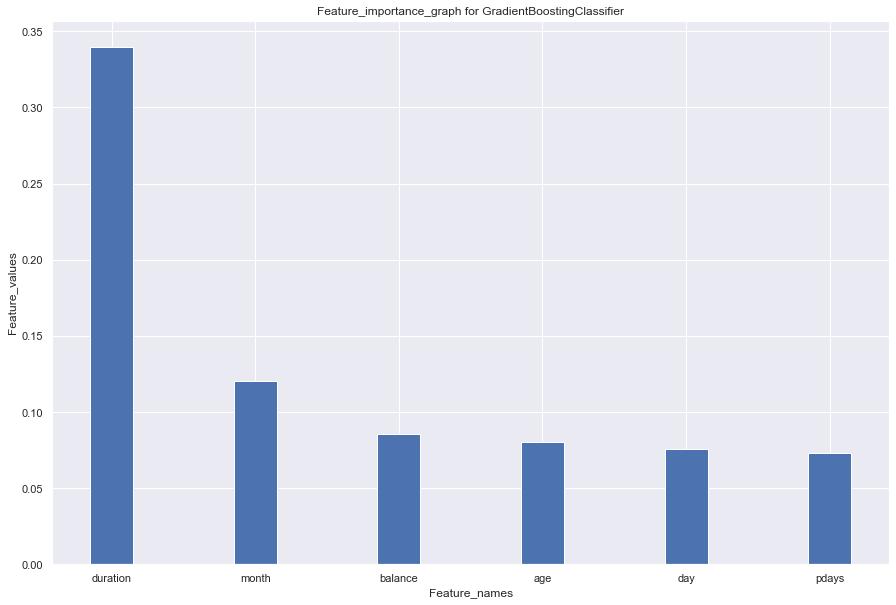

In [58]:
#plot feature importance graphs for all the models.

ada_boost=AdaBoostClassifier(n_estimators=300,algorithm="SAMME.R")
plot_feature_importance(ada_boost,X,y)

decision_tree=DecisionTreeClassifier(max_depth=4)
plot_feature_importance(decision_tree,X,y)

random_forest=RandomForestClassifier(n_estimators=500)
plot_feature_importance(random_forest,X,y)

gradient_boost=grid_gb.best_estimator_
plot_feature_importance(gradient_boost,X,y)

# *Duration is by-far the most important feature
  Balance,Age,Month,pdays also play key role in determining the target.

# What will the bank do to maximise their gain?

1.Duration-They will run the campaign for longer duration.

2.Poutcome-They should rely on the customers of previous marketing campaigns(success).

3.Balance-Person with greater bank balance tend to subscribe more(refer box plot above)

4.Month-There are certain months when marketing activities are higher.

**Things to do to improve the model more

-> Apply deep learning on the model to trace the complexities in the data and improve accuracy.
-> Achieve a good level of tradeoff between precision and recall.